# Сборный проект_Анализ российского кинопроката

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Обработка пустых значений](#Предобработка_пустоты)
    * [Преобразование типов данных в столбцах таблицы](#Предобработка_типы)
    * [Проверка датасета на наличие дубликатов](#Предобработка_дубликаты)
    * [Инициализация новых столбцов в наборе данных](#Предобработка_столбцы)
* [Исследовательский анализ данных](#Исследование)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>


Заказчик исследования: `Министерство культуры Российской Федерации`.

Цель исследования: `Анализ рынка российского кинопроката и выявление текущих трендов`.

Задачи исследования:
1. Проведение предварительной обработки данных;
2. Проведение исследовательского анализа данных;
3. Формирование портрета российского кинопроката;
4. Подготовка выводов и формирование рекомендаций для принятия решений по развитию отечественного кинопроизводства.

Располагаемые данные:
* `mkrf_movies` - данные о прокатных удостоверениях;
* `mkrf_shows` - данные о прокате в российских кинотеатрах.

Датасет `mkrf_movies`:
* **title** — название фильма;
* **puNumber** — номер прокатного удостоверения;
* **show_start_date** — дата премьеры фильма;
* **type** — тип фильма;
* **film_studio** — студия-производитель;
* **production_country** — страна-производитель;
* **director** — режиссёр;
* **producer** — продюсер;
* **age_restriction** — возрастная категория;
* **refundable_support** — объём возвратных средств государственной поддержки;
* **nonrefundable_support** — объём невозвратных средств государственной поддержки;
* **financing_source** — источник государственного финансирования;
* **budget** — общий бюджет фильма;
* **ratings** — рейтинг фильма на КиноПоиске;
* **genres** — жанр фильма.

Датасет `mkrf_shows`:
* **puNumber** — номер прокатного удостоверения;
* **box_office** — сборы в рублях;


## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных **mkrf_movies** и **mkrf_shows** для хранения загруженных датасетов;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Формирование вывода по итогам данного этапа.

In [145]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np
import datetime

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# инициализация переменной mkrf_movies - запись соответствующего набора данных
try:
    mkrf_movies = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

#вывод структуры датасета на экран
display(mkrf_movies.head())

# вывод на экран общей информации о наборе данных
display(mkrf_movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

In [147]:
# инициализация переменной mkrf_shows - запись соответствующего набора данных
try:
    mkrf_shows = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

#вывод структуры датасета на экран
display(mkrf_shows.head())

# вывод общей информации на экран
display(mkrf_shows.info())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

**Вывод**:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot** и **seaborn**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменные **mkrf_shows** и **mkrf_movies** для хранения загруженных датасетов;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Наборы данных характеризуется следующими показателями:
    * `mkrf_movies`:
        * 7 486 - количество строк в датасете;
        * 15 - количество показателей, описывающих объект;
        * 12 столбцов, имеющих явный тип 'object';
        * 3 столбца, имеющих явный тип 'float';
        * 332 - самое минимальное количество непустых значений в столбце (признаки 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source');
    * `mkrf_shows`:
        * 3 158 - количество строк в датасете;
        * 2 - количество показателей, описывающих объект;
        * 1 столбец, имеющих явный тип 'int';
        * 1 столбец, имеющих явный тип 'float';
        * набор данных не содержит пустых значений;   

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Преобразование типов данных в столбцах таблицы;
2. Обработка пустых значений в данных;
3. Проверка датасета на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
4. Изучение состояния столбцов с количественными значениями:
    * Поиск и обработка аномалий в столбцах;
    * Поиск и обработка ошибок;
5. Инициализация новых столбцов в наборе данных:
    * Год проката фильма;
    * Имя и фамилия режиссера фильма;
    * Основной жанр фильма;
    * Доля государственной поддержки от общего бюджета фильма;
6. Формирование вывода по итогам данного этапа.

### Преобразование типов данных в столбцах таблиц <a class = 'anchor' id = 'Преобразование_типы'></a>

Необходимо преобразовать типы данных следующих показателей:

`mkrf_movies`:
* **show_start_date** - дата премьеры фильма;
* **ratings** - рейтинг фильма на КиноПоиске;

`mkrf_shows`:
* **puNumbers** - номер прокатного удостоверения.


In [148]:
# преобразование типов данных столбцов в датасете 'mkrf_movies'
mkrf_movies['show_start_date'] = mkrf_movies['show_start_date'].str.slice(start=0, stop=10)
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format = '%Y-%m-%d')
mkrf_movies['ratings'] = pd.to_numeric(mkrf_movies['ratings'], errors = 'coerce')

# преобразование типов данных столбцов в датасете 'mkrf_shows'
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

In [149]:
# вывод на экран текущих типов данных в столбцах датасетов
print('Типы данных в датасете mkrf_movies после преобразования:')
display(mkrf_movies.dtypes)
print()
print('Типы данных в датасете mkrf_shows после преобразования:')
display(mkrf_shows.dtypes)

Типы данных в датасете mkrf_movies после преобразования:


title                            object
puNumber                         object
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
dtype: object


Типы данных в датасете mkrf_shows после преобразования:


puNumber       object
box_office    float64
dtype: object

### Обработка пустых значений в данных <a class = 'anchor' id = 'Предобработка_пустоты'></a>

Пустые значения имеются в наборе `mkrf_movies`, в то время как в наборе `mkrf_shows` таковых не иммеется.

Работа в этом подразделе направлена на обработку пустот в `mkrf_movies`.

In [150]:
# вывод на экран информации о пропущенных значениях

emptyValues_info = (mkrf_movies.isna().sum() # формирование свода о суммарном количестве пустых значений по столбцам
                    .to_frame().rename(columns = ({0 : 'empty_values'}))) # преобразование к типу датафрейм и переименование столбца
emptyValues_info['%_empty'] = round(emptyValues_info['empty_values'] / len(mkrf_movies) * 100, 2)
display(emptyValues_info.sort_values(by = 'empty_values', ascending = False))

print(f'Количество объектов в наборе данных ДО преобразования пустых значений:', mkrf_movies.shape[0])

,empty_values,%_empty
refundable_support,7154,95.57
nonrefundable_support,7154,95.57
budget,7154,95.57
financing_source,7154,95.57
ratings,996,13.30
genres,976,13.04
producer,568,7.59
film_studio,18,0.24
director,9,0.12
production_country,2,0.03


Количество объектов в наборе данных ДО преобразования пустых значений: 7486


**Вывод по итогу построения свода**:

1. Количество пустых значений в столбцах **director**, **film_studio**, **production_country**, **title** крайне мало. **Исключение таких объектов из общего набора не повлияет на общую картину**;
2.  Пустые значения в категориальных параметрах **genres**, **producer**, **financing_source** можно заменить на значение "неизвестно" - таким образом, мы можем в дальнейшем осуществлять группировку по данным категориям;
3. Для количественных параметров **refundable_support**, **nonrefundable_support** и **budget** пустые значения можно заменить на 0.0, так как по вводной от заказчика указано: столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. А два других столбца являются производной информацией от данных в показателе **budget**.

In [151]:
# исключим пустые объекты из общего набора по параметрам 'production_country', 'film_studio' и 'director'
for feature in ['production_country', 'film_studio', 'director', 'puNumber']:
    mkrf_movies = mkrf_movies.dropna(subset = feature)

# замена пустых значений в категориальных параметрах 'genres', 'producer', 'financing_source'
mkrf_movies[['genres', 'producer', 'financing_source']] = mkrf_movies[['genres', 'producer', 'financing_source']].fillna('Неизвестно')

# замена пустых значений в количественных параметрах 'refundable_support', 'nonrefundable_support', 'budget'
mkrf_movies[['refundable_support', 'nonrefundable_support', 'budget']] = mkrf_movies[['refundable_support', 'nonrefundable_support', 'budget']].fillna(0.0)

In [152]:
# вывод на экран статистики после внесения изменений в данные
(display(mkrf_movies.isna().sum()
 .to_frame().rename(columns = ({0 : 'empty_values'})).sort_values(by = 'empty_values', ascending = False)))

print(f'Количество объектов в наборе данных ПОСЛЕ преобразования пустых значений:', mkrf_movies.shape[0])

,empty_values
ratings,977
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,0
age_restriction,0


Количество объектов в наборе данных ПОСЛЕ преобразования пустых значений: 7459


### Обработка дубликатов в наборе данных <a class = 'anchor' id = 'Предобработка_дубликаты'></a>

In [153]:
# вывод на экран информации по явным дубликатам в наборах данных
print('Количество явных дубликатов в наборе данных mkrf_movies:', mkrf_movies.duplicated().sum())
print('Количество явных дубликатов в наборе данных mkrf_shows:', mkrf_shows.duplicated().sum())

Количество явных дубликатов в наборе данных mkrf_movies: 0
Количество явных дубликатов в наборе данных mkrf_shows: 0


**В наборах данных отсутствуют явные дубликаты**.

В следующих шагах необходимо детально рассмотреть наборы данных на задвоение значений в столбцах, имеющих категориальные признаки.

А также изучить датасет `mkrf_movies` на наличие неявных дубликатов в столбцах с категориальными значениями.

In [154]:
# вывод на экран количества дубликатов в поле с номером прокатного удостоверения - 'puNumber' - в датасете 'mkrf_shows'
print('Количество дубликатов в столбце puNumber датасете mkrf_shows:', mkrf_shows['puNumber'].duplicated().sum())

Количество дубликатов в столбце puNumber датасете mkrf_shows: 0


In [155]:
# вывод на экран количества дубликатов в полях с номером прокатного удостоверения и названием фильма - 'puNumber' и 'title' - в датасеет 'mkrf_movies'
for feature in ['puNumber', 'title']:
    print(f'Количество дубликатов в параметре {feature}:', mkrf_movies[feature].duplicated().sum())

Количество дубликатов в параметре puNumber: 2
Количество дубликатов в параметре title: 713


In [156]:
#вывод на экран информации по объектам с одинаковым номером прокатного удостоверения
display(mkrf_movies[mkrf_movies['puNumber'].duplicated()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Неизвестно,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,Неизвестно,6.8,"комедия,криминал"


Не совсем понятно, почему разные значения прокатного удостоверения выявлены как дубликаты - возможно, здесь присутствует техническая ошибка в данных.

**Исключение данных объектов из общего набора не повлияет на общую картину**.

Дубликаты в столбце **title** не являются ошибкой - фильмы с одинаковым названием могут выходить в прокат в разное время в зависимости от выдачи удостоверения прокатчику.

In [157]:
# исключаем из датасета объекты с дубликатами прокатного удостоверения
mkrf_movies = mkrf_movies.drop_duplicates(subset = 'puNumber', keep  = 'first')

In [158]:
# инициализация пользовательской функции по формированию свода уникальных значений по столбцу таблицы
def unique_values (df: pd.DataFrame, feature: str):
    print(f'Уникальные значения столбца {feature}')
    display(pd.Series(df[feature].unique()))

In [159]:
# вывод на экран уникальных значений показателя 'type'
unique_values(mkrf_movies, 'type')

Уникальные значения столбца type


0                Художественный
1                  Анимационный
2                        Прочие
3                Документальный
4             Научно-популярный
5                Художественный
6                  Анимационный
7    Музыкально-развлекательный
dtype: object

In [160]:
# вывод на экран уникальных значений показателя 'age_restriction'
unique_values(mkrf_movies, 'age_restriction')

Уникальные значения столбца age_restriction


0               «18+» - запрещено для детей
1             «6+» - для детей старше 6 лет
2           «12+» - для детей старше 12 лет
3           «16+» - для детей старше 16 лет
4    «0+» - для любой зрительской аудитории
dtype: object

Для показателя **age_restriction** выполним небольшую обработку значений - **извлечем показатель возрастной категории, а остальное описание удалим**.

In [161]:
# извлечение значений возрастной категории
mkrf_movies['age_restriction'] = mkrf_movies['age_restriction'].str.slice(start = 0, stop = 4)
# замена оставшихся символов
for symb in ['«', '»']:
    mkrf_movies['age_restriction'] = mkrf_movies['age_restriction'].str.replace(symb, '')
# вывод на экран обновленных значений
mkrf_movies['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

In [162]:
# вывод на экран уникальных зачений показателя 'financing_source'
unique_values(mkrf_movies, 'financing_source')

Уникальные значения столбца financing_source


0                          Неизвестно
1               Министерство культуры
2                           Фонд кино
3    Министерство культуры, Фонд кино
dtype: object

В остальных категориальных столбцах сочетания значений жанров (**genres**), киностудии, выпустившей фильм (**film_studio**), страны производства (**production_country**), продюссеров фильма (**producer**) формируют большое количество уникальных значений и изучить информацию о них на данном шаге не представляется возможным.

По столбцу с данными о режиссере фильма (**director**) тоже проблематично изучить уникальные значения имен, так как режиссеров слишком много для вывода их на экран.


### Изучение состояния столбцов с количественными переменными <a class = 'anchor' id = 'Предобработка_количественные'></a>

In [163]:
# формирование списка названий столбцов, содержащих количественные значения
num_values = mkrf_movies.select_dtypes(include = ['float', 'int']).columns.to_list()

# вывод на экран значений списка
print(num_values)

['refundable_support', 'nonrefundable_support', 'budget', 'ratings']


In [176]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature}', fontsize = 10)
    plt.xlabel(feature)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

    # вывод на экран объектов, с значениями, превышающими верхнюю границу
    display(data[data[feature] > upper_bound]['title'].unique())

Для построения гистограмм распределения значений финансовой поддержки со стороны государства сформируем отдельную переменную, где **показатели бюджета не будут равны 0**.

In [177]:
# инициализация переменной 'state_movies' для хранения фильмов получивших государственную поддержку
state_movies = mkrf_movies[mkrf_movies['budget'] != 0]

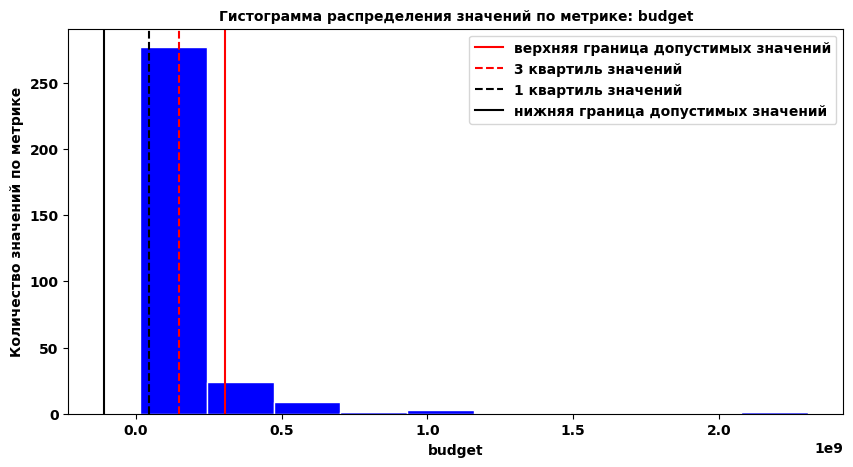

Доля значений, выходящих за верхнюю границу: 8.89%
Доля значений, выходящих за нижнюю границу: 0.00%


array(['Батальонъ', 'Территория', 'Он - Дракон', 'Экипаж .',
       'Крякнутые каникулы', 'Время первых (2017)', 'Дуэлянт', 'Ледокол',
       'Защитники', 'БОЛЬШОЙ', 'Урфин Джюс и его деревянные солдаты',
       'Матильда', 'Салют-7', 'Последний богатырь', 'Легенда о Коловрате',
       'Движение вверх', 'Тренер', 'Гурвинек. Волшебная игра', 'Т-34',
       'Снежная Королева: Зазеркалье', 'Волки и Овцы: Ход Свиньей',
       'Тобол', 'Девятая', 'Тайна Печати Дракона', 'Грех',
       'Лев Яшин. Вратарь моей мечты', 'Союз спасения', 'Вторжение'],
      dtype=object)

In [ ]:
# построение гистограммы распределения значений бюджета
histogram_plotting(state_movies, 'budget', 10, 10, 5)

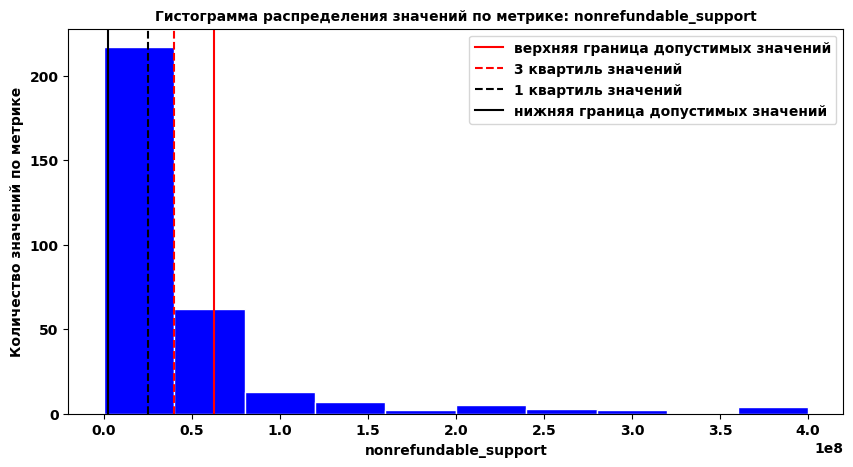

Доля значений, выходящих за верхнюю границу: 13.33%
Доля значений, выходящих за нижнюю границу: 2.54%


array(['Невидимки', 'А зори здесь тихие..._', 'Призрак_.', 'Левиафан.',
       'Однажды._', 'Смешарики. Легенда о золотом драконе', 'Он - Дракон',
       'Экипаж .', 'Дама Пик', 'Время первых (2017)', 'Дуэлянт',
       'Ледокол', 'Защитники', 'СНЕЖНАЯ КОРОЛЕВА 3. ОГОНЬ И ЛЁД',
       'Ёлки 5', 'БОЛЬШОЙ', 'Простая история .', 'Молот',
       'Урфин Джюс и его деревянные солдаты', 'Матильда', 'Напарник',
       'Салют-7', 'Легенда о Коловрате', 'Движение вверх', 'Рубеж',
       'Тренер', 'Черновик', 'Вечная жизнь Александра Христофорова',
       'Семь пар нечистых', 'Крымский мост. Сделано с любовью',
       'СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ', 'Т-34', 'Тобол', 'Братство',
       'Миллиард', 'Девятая', 'Одесса', 'Тайна Печати Дракона', 'Герой',
       'Урфин Джюс возвращается', 'Союз спасения', 'Вторжение'],
      dtype=object)

In [ ]:
# построение гистограммы распределения значений невозвратных средств
histogram_plotting(state_movies, 'nonrefundable_support', 10, 10, 5)

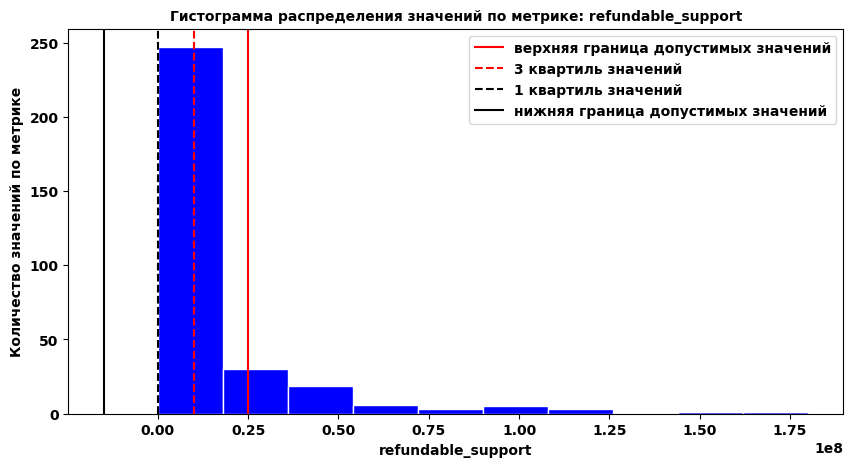

Доля значений, выходящих за верхнюю границу: 15.56%
Доля значений, выходящих за нижнюю границу: 0.00%


array(['А зори здесь тихие..._', 'Елки Лохматые',
       'Снежная Королева 2: Перезаморозка', 'Территория',
       'Смешарики. Легенда о золотом драконе', 'Дабл трабл',
       'Самый Лучший День', 'Страна чудес', 'Переводчик.', 'Супербобровы',
       'Волки и овцы: б-е-е-е-зумное превращение', 'Экипаж .',
       'Млечный путь (2015)', 'Крякнутые каникулы', 'Герой (2015)',
       'Кухня. Последняя битва', 'Время первых (2017)', 'Дуэлянт',
       'Вурдалаки', 'Ледокол', 'Защитники', 'Дед Мороз. Битва Магов',
       'СНЕЖНАЯ КОРОЛЕВА 3. ОГОНЬ И ЛЁД', 'Ночные стражи', 'Молот',
       'Три дня до весны.', 'Матильда', 'Последний богатырь',
       'Легенда о Коловрате', 'Ёлки Новые',
       'Три богатыря и принцесса Египта',
       'Ну, здравствуй, Оксана Соколова!', 'Черновик',
       'Гурвинек. Волшебная игра', 'СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ',
       'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34',
       'Снежная Королева: Зазеркалье', 'Волки и Овцы: Ход Свиньей',
       '

In [180]:
# построение гистограммы распределения значений возвратных средств
histogram_plotting(state_movies, 'refundable_support', 10, 10, 5)

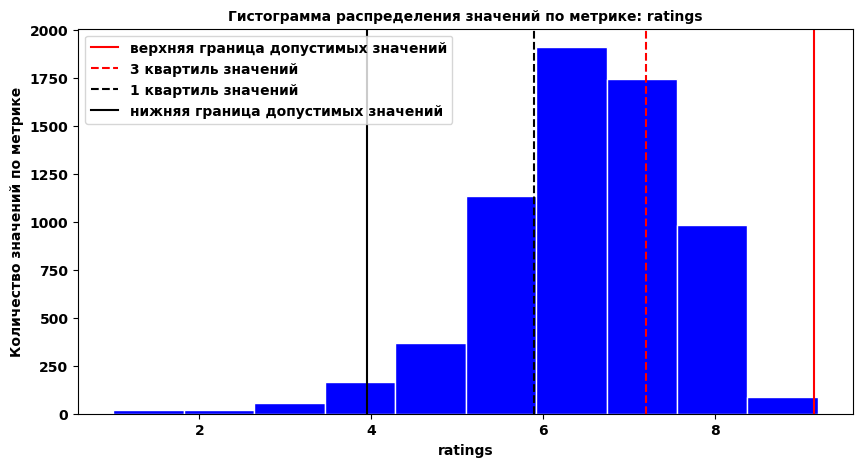

Доля значений, выходящих за верхнюю границу: 0.01%
Доля значений, выходящих за нижнюю границу: 2.39%


array(['Друзья друзей'], dtype=object)

In [182]:
# построение гистограммы распределения значений рейтинга фильма
histogram_plotting(mkrf_movies, 'ratings', 10, 10, 5)

In [183]:
# вывод на экран минимальных и максимальных значений по показателю 'rating'
print('Максимальное значение рейтинга в наборе данных:', mkrf_movies['ratings'].max())
print('Минимальное значение рейтинга в наборе данных:', mkrf_movies['ratings'].min())

Максимальное значение рейтинга в наборе данных: 9.2
Минимальное значение рейтинга в наборе данных: 1.0


**Вывод по построенной визуализации**:

### Инициализация новых столбцов в наборе данных <a class = 'anchor' id = 'Предобработка_новыеСтолбцы'></a>

In [186]:
# инициализация столбца 'year' для хранения значений года выхода в прокат
mkrf_movies['year'] = mkrf_movies['show_start_date'].dt.year

# инициализация столбца с именем и фамилией главного режиссера
mkrf_movies['main_director'] = mkrf_movies['director'].str.split(',').str[0]

# инициализация столбца с главным жанром фильма
mkrf_movies['main_genre'] = mkrf_movies['genres'].str.split(',').str[0]

In [187]:
# вывод на экран структуры обновленного датасета
display(mkrf_movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,0.0,Неизвестно,7.2,"боевик,драма,мелодрама",2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,6+,0.0,0.0,0.0,Неизвестно,6.6,"драма,военный",2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,Неизвестно,6.8,"фантастика,боевик,триллер",2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,Неизвестно,6.8,"фантастика,боевик,триллер",2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,Неизвестно,6.8,"фантастика,боевик,триллер",2015,Тимур Бекмамбетов,фантастика
